# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_per_type=pyber_data_df.groupby(['type']).count()['ride_id']
rides_per_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_per_type=city_data_df.groupby(['type']).sum()['driver_count']
drivers_per_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city typdrivers_per_type=pyber_data_df.groupby(['type']).count()['driver_count']
fares_per_type=pyber_data_df.groupby(['type']).sum()['fare']
fares_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_type=pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df.groupby(['type']).count()['ride_id']
average_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=pyber_data_df.groupby(['type']).sum()['fare']/city_data_df.groupby(['type']).sum()['driver_count']
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
    'Total Rides':rides_per_type,
    'Total Drivers':drivers_per_type,
    'Total Fares':fares_per_type,
    'Average Fare per Ride':average_fare_type,
    'Average Fare per Driver':average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type_df=pyber_data_df.groupby(['type','date']).sum()['fare']
date_type_df

type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_type_df=date_type_df.reset_index()
date_type_df['date']=pd.to_datetime(date_type_df['date'])
date_type_df

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-11 04:39:00,16.42
2,Rural,2019-01-14 15:58:00,54.10
3,Rural,2019-01-14 07:09:00,18.05
4,Rural,2019-01-15 21:44:00,30.26
...,...,...,...
2359,Urban,2019-05-08 01:54:00,32.69
2360,Urban,2019-05-08 02:31:00,41.33
2361,Urban,2019-05-08 04:20:00,21.99
2362,Urban,2019-05-08 04:39:00,18.45


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_date_type=pd.pivot_table(data=date_type_df,index='date', columns='type', values='fare')
pivot_date_type

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [104]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_new_dates_df=pivot_date_type.loc['2019-01-01':'2019-04-28']
pivot_new_dates_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [106]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#df.index = pd.to_datetime(df.index)
pivot_date_type.index= pd.to_datetime(pivot_date_type.index)

In [107]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_new_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [108]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_date_type_perweek=pivot_new_dates_df.resample('W').sum()
pivot_date_type_perweek

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


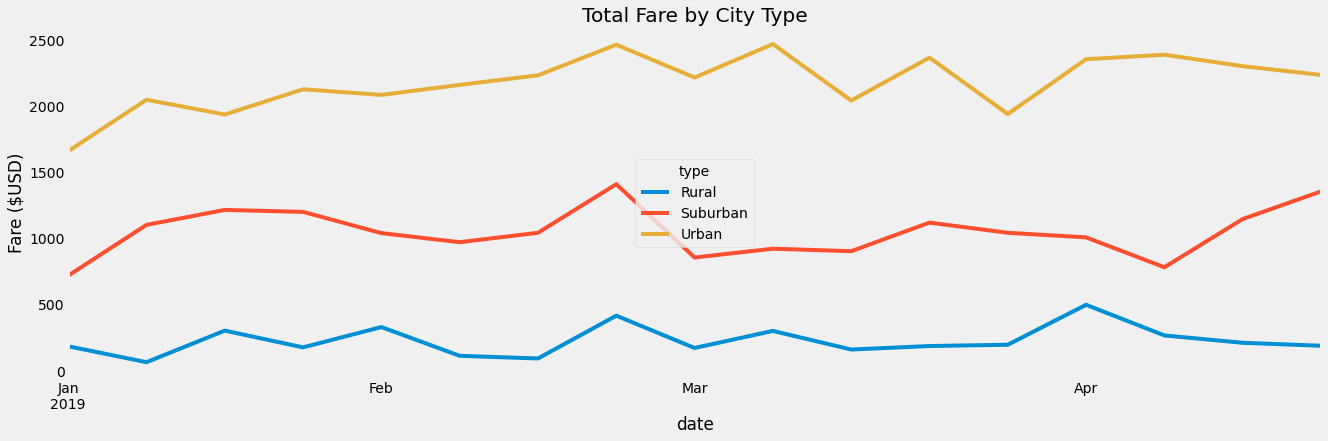

In [113]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

ax= pivot_date_type_perweek.plot(figsize=(20, 6))

# Add the title, y-axis label and grid.
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.grid()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig('analysis/PyBer_fare_summary.png')
plt.show()



